In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc

# Configuración de visualización
sns.set(style="whitegrid")

# Carga y Exploración de Datos

In [3]:
# Carga de datos
df = pd.read_csv('C:/Users/Gerardo_PC/Desktop/DS4Business - Data Scientist/07_PortfolioDS/01_AbandonoEmpleados/00_Dataset/AbandonoEmpleados.csv',
               sep=';',
               index_col='id')

In [4]:
display(df.info())
display(df.head())
display(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1470 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1470 non-null   object 
 14  estado_civil 

None

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,#N/D,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,#N/D,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,#N/D,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,#N/D,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,#N/D,2,NaN,2,2


Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'conciliacion',
       'anos_compania', 'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')

## Análisis de Valores Faltantes

In [5]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns={0: 'Valores Faltantes', 1: '% del Total'})
    return mis_val_table[mis_val_table['Valores Faltantes'] > 0]

display(missing_values_table(df))

,Valores Faltantes,% del Total
sexo,199,13.537415
anos_en_puesto,1238,84.217687


In [6]:
df.drop(columns = ['anos_en_puesto','sexo'], inplace = True)
df.head(10)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,implicacion,...,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,Alta,...,Alta,Baja,80,0,8,0,#N/D,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,Media,...,Muy_Alta,Muy_Alta,80,1,10,3,#N/D,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,Media,...,Alta,Media,80,0,7,3,#N/D,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,Alta,...,Alta,Alta,80,0,8,3,#N/D,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,Alta,...,Alta,Muy_Alta,80,1,6,3,#N/D,2,2,2
8,32,No,Travel_Frequently,Research & Development,2,Universitaria,Life Sciences,1,Muy_Alta,Alta,...,Alta,Alta,80,0,8,2,#N/D,7,3,6
10,59,No,Travel_Rarely,Research & Development,3,Master,Medical,1,Alta,Muy_Alta,...,Muy_Alta,Baja,80,3,12,3,Muy_Alta,1,0,0
11,30,No,Travel_Rarely,Research & Development,24,Universitaria,Life Sciences,1,Muy_Alta,Alta,...,Muy_Alta,Media,80,1,1,2,#N/D,1,0,0
12,38,No,Travel_Frequently,Research & Development,23,Secundaria,Life Sciences,1,Muy_Alta,Media,...,Muy_Alta,Media,80,0,10,2,#N/D,9,1,8


# Análisis Exploratorio de Datos (EDA)

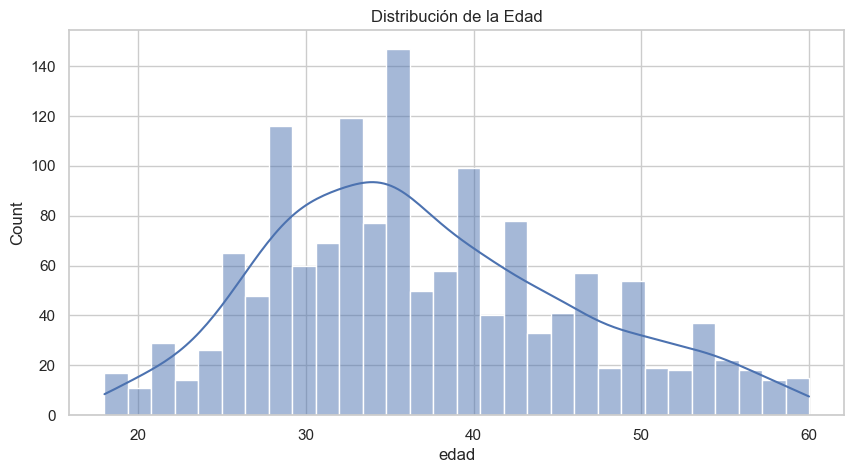

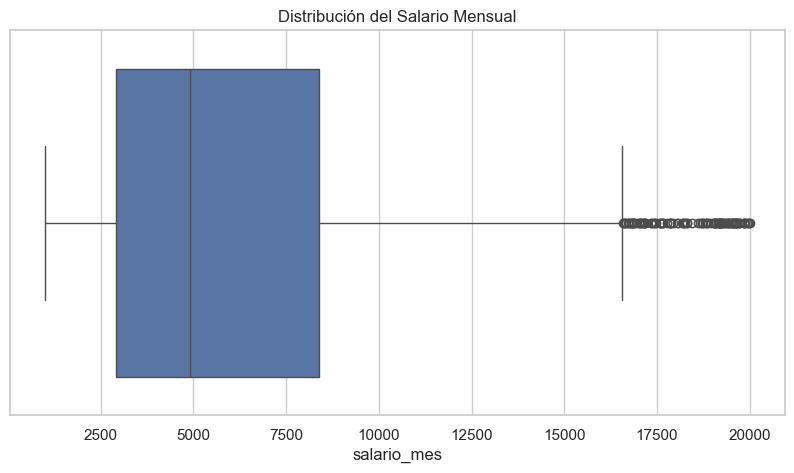

In [7]:
# Visualizamos distribuciones y relaciones clave en los datos.
plt.figure(figsize=(10,5))
sns.histplot(df['edad'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['salario_mes'])
plt.title('Distribución del Salario Mensual')
plt.show()

## Visualización de Variables Categoricas

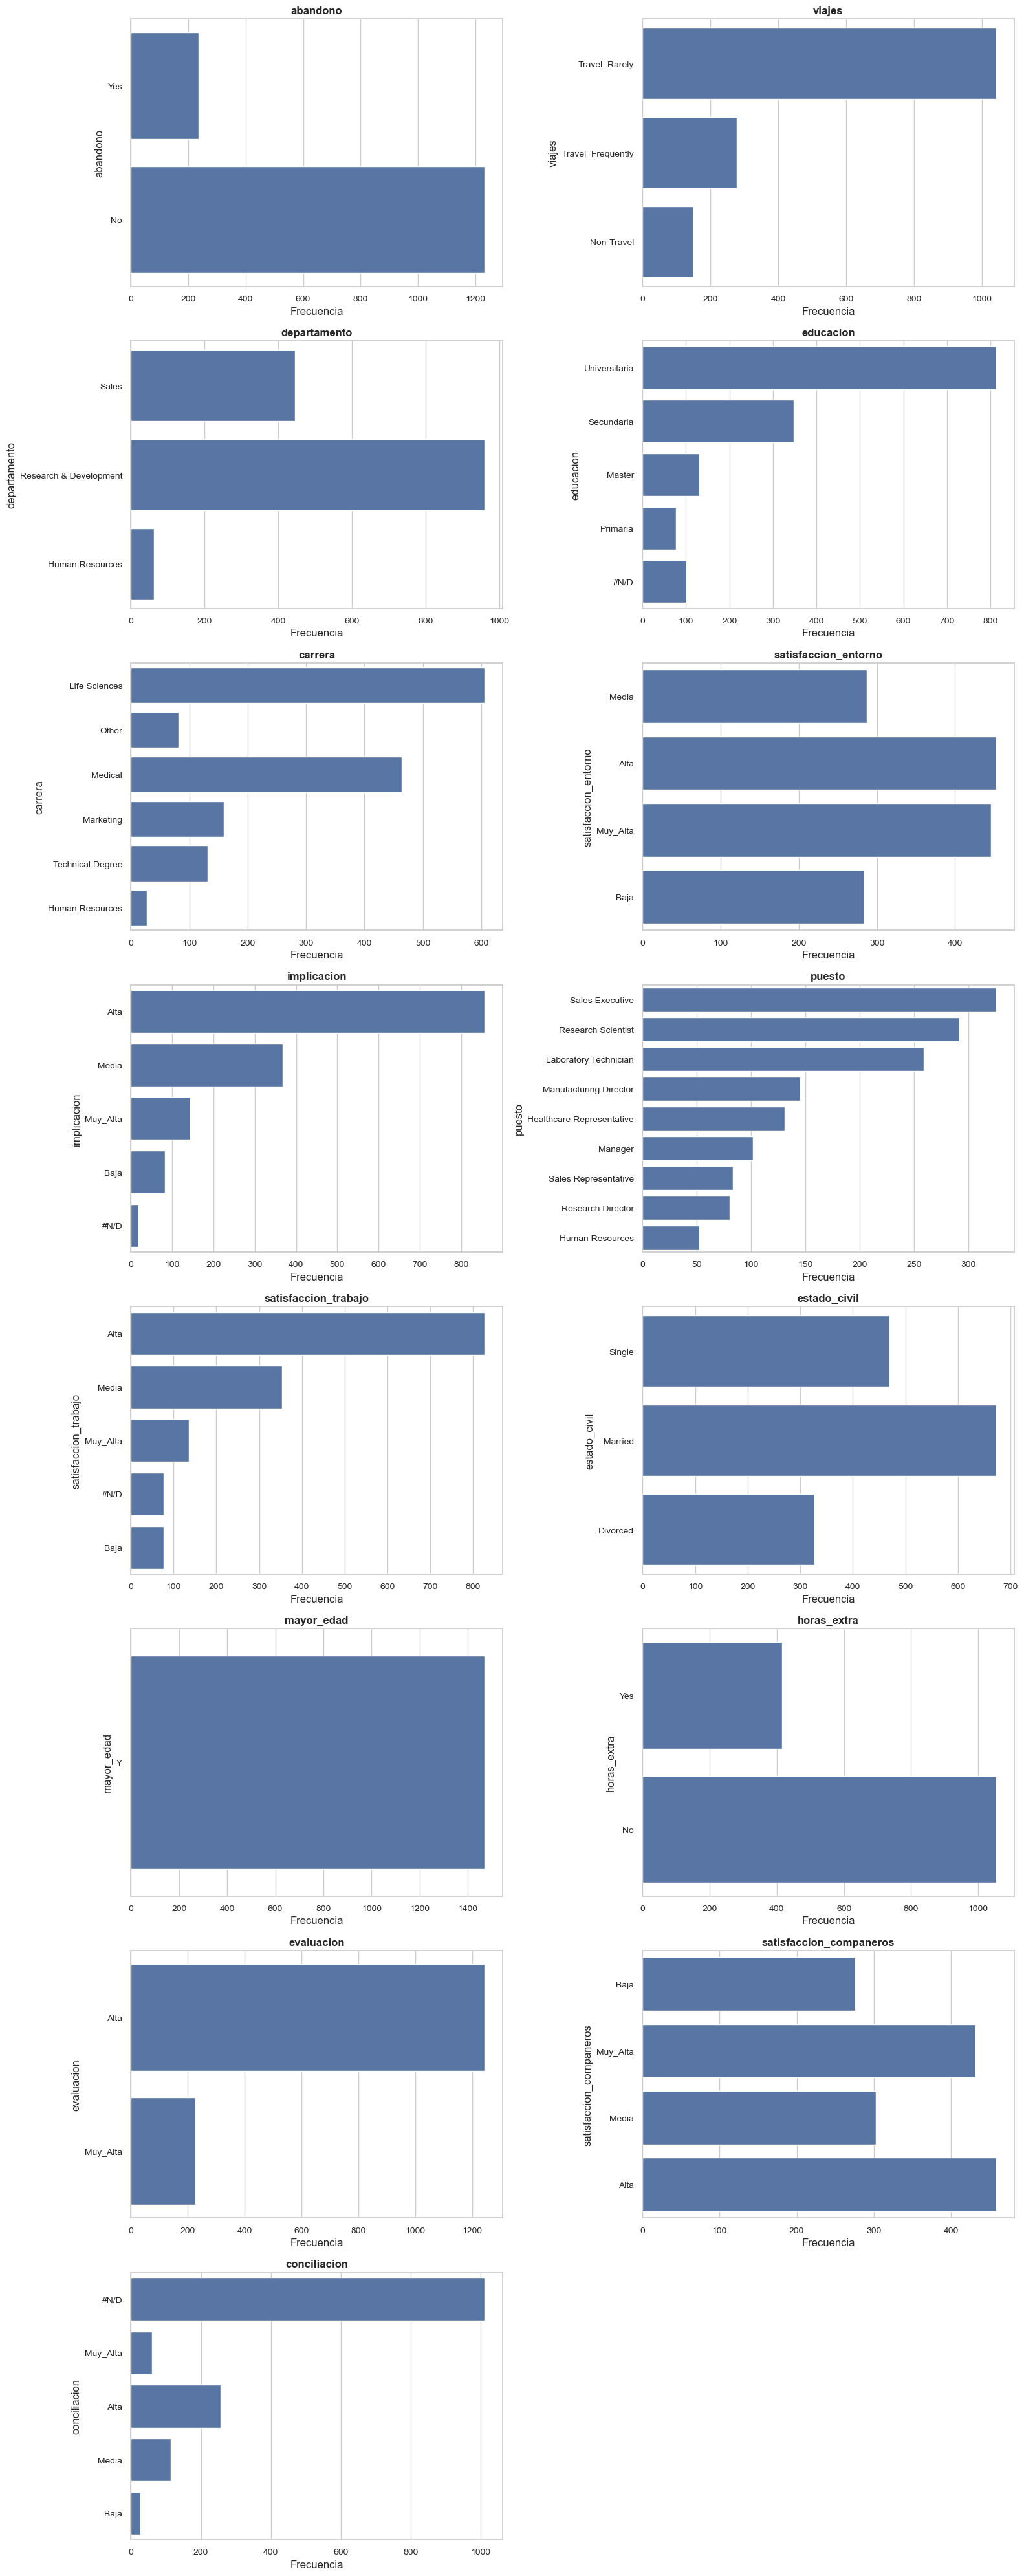

In [8]:
from math import ceil

def graficos_eda_categoricos(cat_df):
    """
    Genera gráficos de barras horizontales para variables categóricas.
    
    Parámetros:
    cat_df (DataFrame): DataFrame con solo variables categóricas.
    """
    if cat_df.shape[1] == 0:
        print("No hay variables categóricas en el DataFrame.")
        return
    
    num_vars = cat_df.shape[1]  # Número de variables categóricas
    filas = ceil(num_vars / 2)   # Cantidad de filas necesarias

    fig, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 5))
    ax = ax.flatten()  # Aplanar para iterar fácilmente

    for i, col in enumerate(cat_df.columns):
        sns.countplot(y=cat_df[col], ax=ax[i])
        ax[i].set_title(col, fontsize=12, fontweight="bold")
        ax[i].tick_params(labelsize=10)
        ax[i].set_xlabel("Frecuencia")
        ax[i].set_ylabel(col)

    # Ocultar los ejes vacíos en caso de número impar de gráficos
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])
    
    plt.tight_layout()
    plt.show()

# Aplicación de la función al DataFrame con variables categóricas
graficos_eda_categoricos(df.select_dtypes(include=['object']))



## Visualización de Variables Numéricas

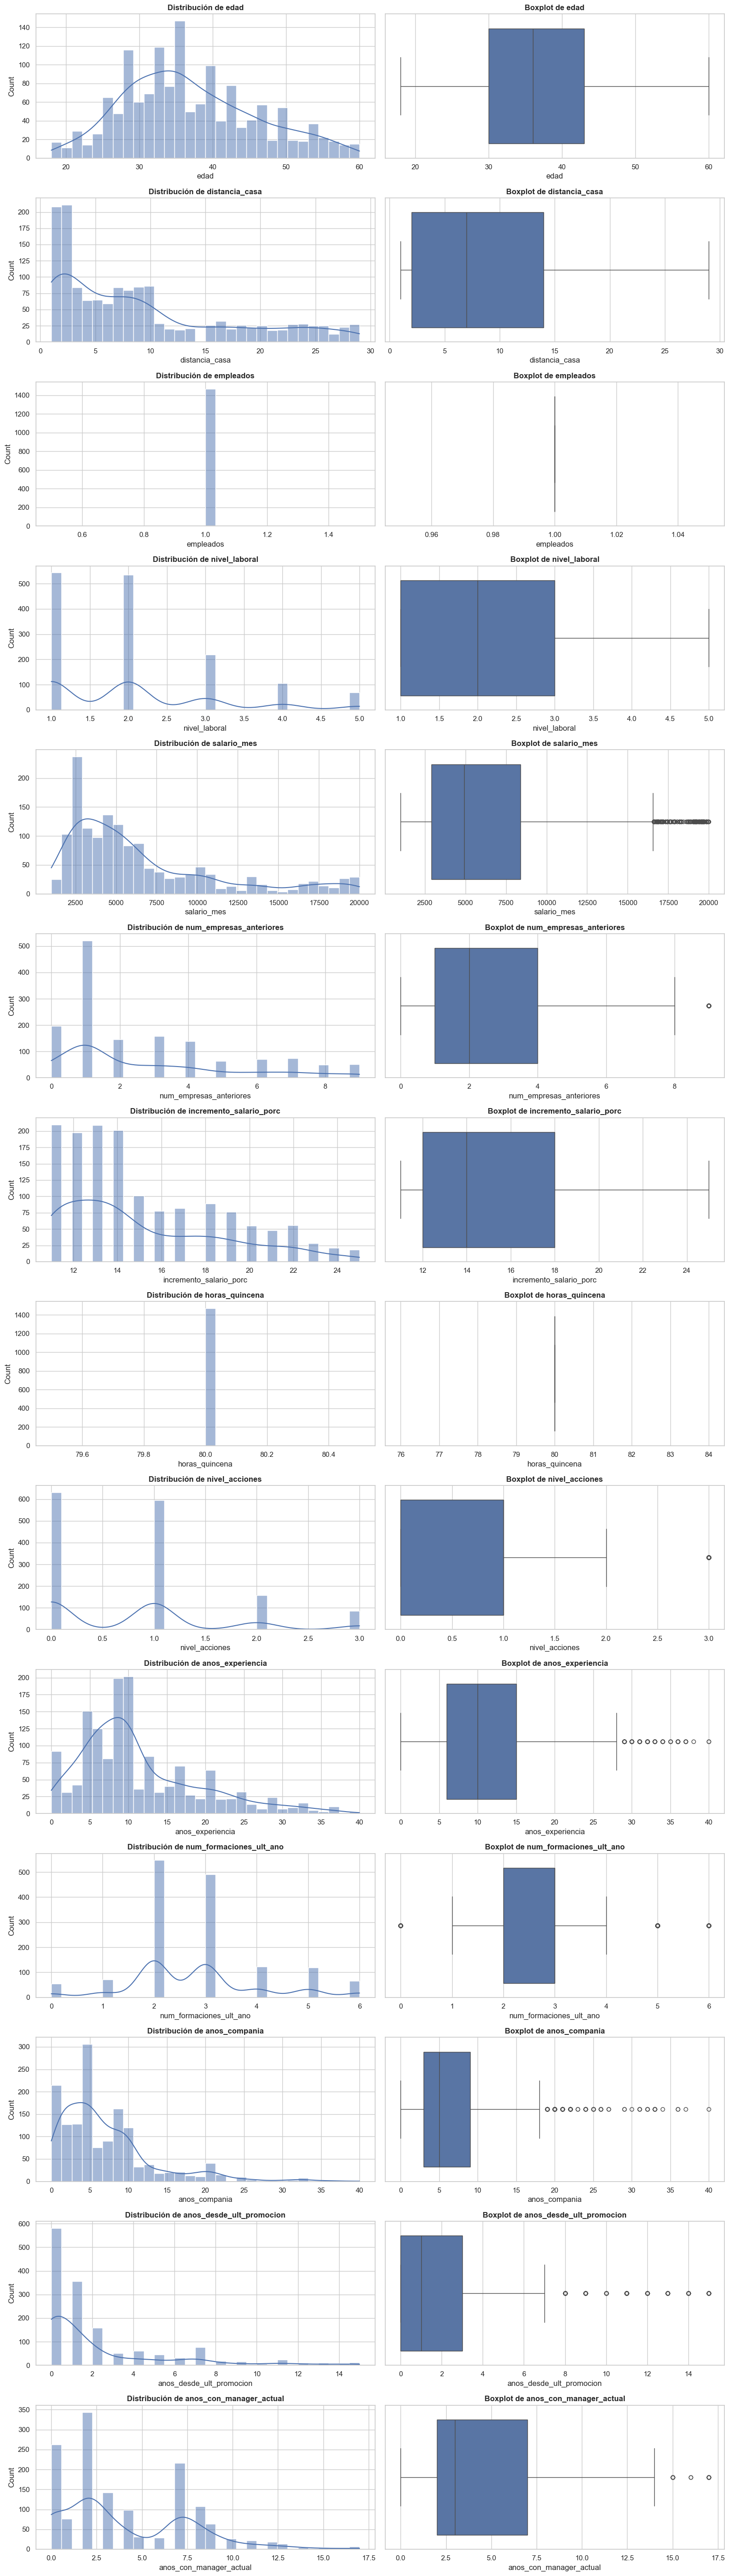

In [9]:
def graficos_eda_numericos(df_numerico):
    if df_numerico.shape[1] == 0:
        print("No hay variables numéricas para graficar.")
        return
    
    filas = len(df_numerico.columns)
    fig, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 4))
    ax = ax.flatten()
    
    for i, col in enumerate(df_numerico.columns):
        sns.histplot(df_numerico[col], bins=30, kde=True, ax=ax[i*2])
        ax[i*2].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
        sns.boxplot(x=df_numerico[col], ax=ax[i*2+1])
        ax[i*2+1].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

graficos_eda_numericos(df.select_dtypes(include=['number']))

# Business Analytics e Insights

## Cuantificación del problema: ¿Cuál es la tasa de abandono?

In [10]:
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})
abandono_rate = df['abandono'].mean() * 100
print(f"Tasa de abandono: {abandono_rate:.2f}%")

Tasa de abandono: 16.12%


## ¿Hay un perfil tipo de empleado que deja la empresa?

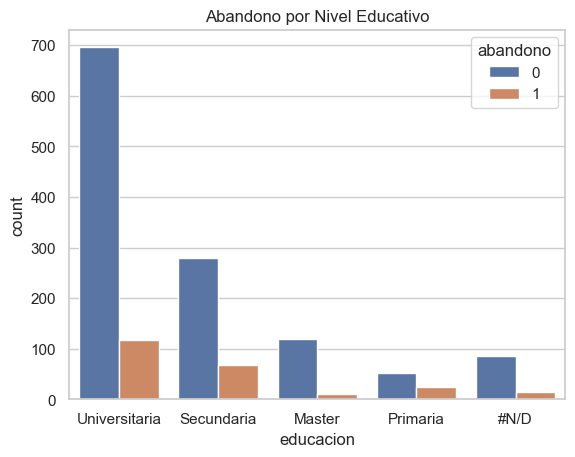

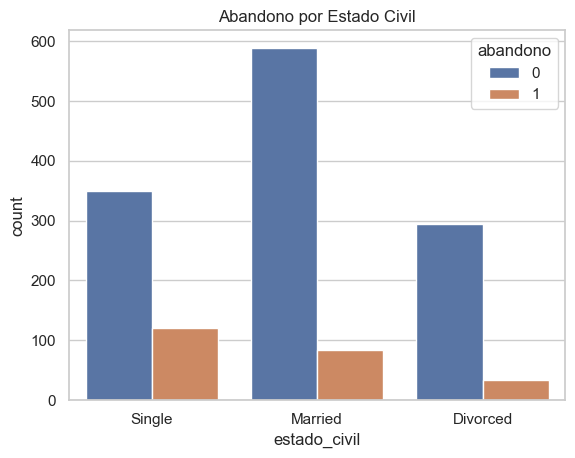

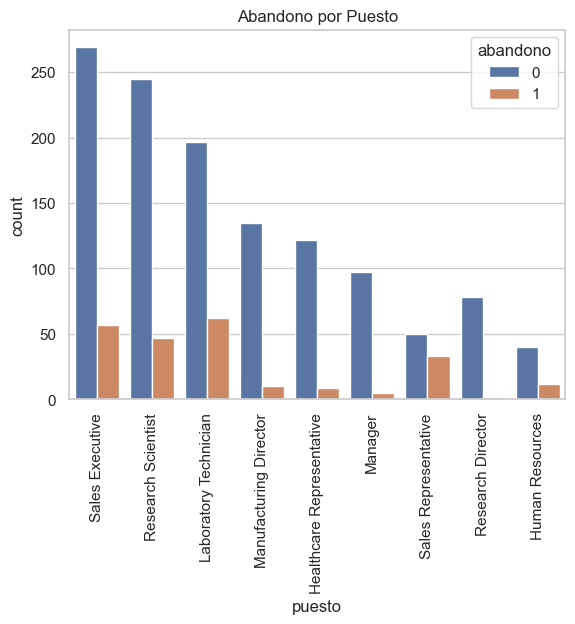

In [11]:
# Análisis por educación
sns.countplot(x='educacion', hue='abandono', data=df)
plt.title("Abandono por Nivel Educativo")
plt.show()

# Análisis por estado civil
sns.countplot(x='estado_civil', hue='abandono', data=df)
plt.title("Abandono por Estado Civil")
plt.show()

# Análisis por puesto
sns.countplot(x='puesto', hue='abandono', data=df)
plt.title("Abandono por Puesto")
plt.xticks(rotation=90)
plt.show()


## Limpieza de Datos

In [12]:
df = pd.get_dummies(df, drop_first=True)

## Análisis de Correlaciones

In [13]:
corr_matrix = df.corr().abs()
corr_unstacked = corr_matrix.unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[corr_unstacked < 1].reset_index()
corr_unstacked.columns = ['Variable 1', 'Variable 2', 'Correlación']
top_10_corr = corr_unstacked.head(10)

display(top_10_corr)  # Muestra las 10 correlaciones más altas

,Variable 1,Variable 2,Correlación
0,implicacion_Media,satisfaccion_trabajo_Media,0.974622
1,satisfaccion_trabajo_Media,implicacion_Media,0.974622
2,implicacion_Muy_Alta,satisfaccion_trabajo_Muy_Alta,0.968907
3,satisfaccion_trabajo_Muy_Alta,implicacion_Muy_Alta,0.968907
4,educacion_Secundaria,implicacion_Media,0.963740
5,implicacion_Media,educacion_Secundaria,0.963740
6,educacion_Primaria,implicacion_Baja,0.961101
7,implicacion_Baja,educacion_Primaria,0.961101
8,satisfaccion_trabajo_Alta,implicacion_Alta,0.960478
9,implicacion_Alta,satisfaccion_trabajo_Alta,0.960478


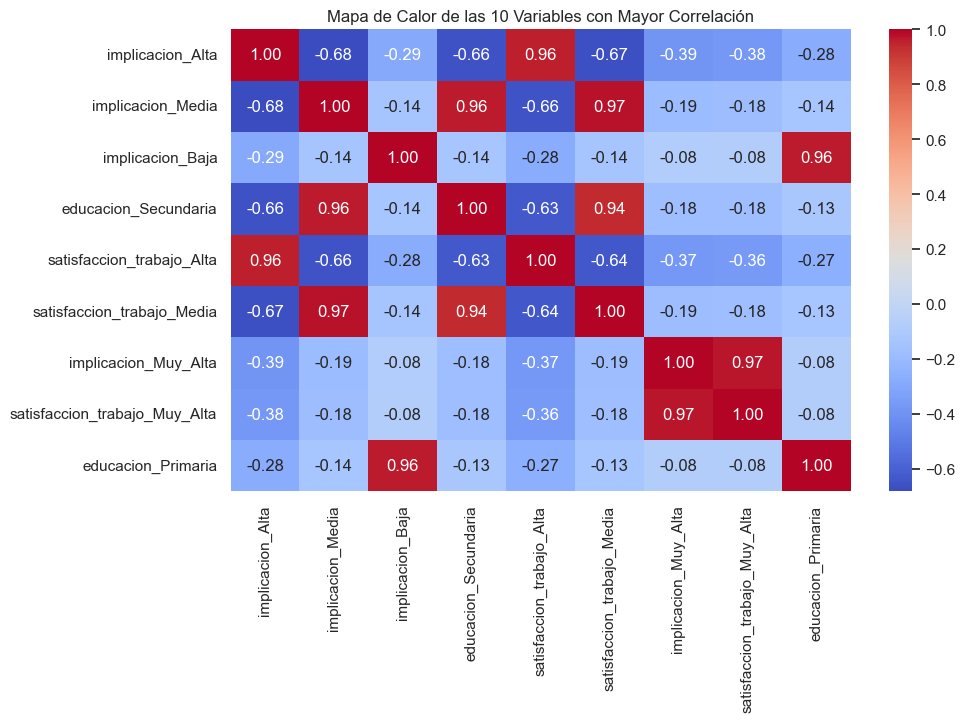

In [14]:
# Se genera un mapa de calor para visualizar las correlaciones entre variables.

# Filtrar solo las variables más correlacionadas
variables_correlacionadas = list(set(top_10_corr['Variable 1']).union(set(top_10_corr['Variable 2'])))
corr_top_10 = df[variables_correlacionadas].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_top_10, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Mapa de Calor de las 10 Variables con Mayor Correlación')
plt.show()

# Conclusiones y Recomendaciones

In [15]:
# Se presentan observaciones y posibles mejoras en base a los análisis realizados.

print("\nConclusiones:\n")
print("- Se observó una variabilidad significativa en salarios y niveles de experiencia.")
print("- Algunas variables pueden estar correlacionadas con la permanencia en la empresa.")
print("- Se recomienda investigar más sobre la satisfacción laboral y conciliación.")


Conclusiones:

- Se observó una variabilidad significativa en salarios y niveles de experiencia.
- Algunas variables pueden estar correlacionadas con la permanencia en la empresa.
- Se recomienda investigar más sobre la satisfacción laboral y conciliación.


# Modelado Predictivo: Predicción de Abandono


Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

Matriz de Confusión:
[[240   7]
 [ 43   4]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294



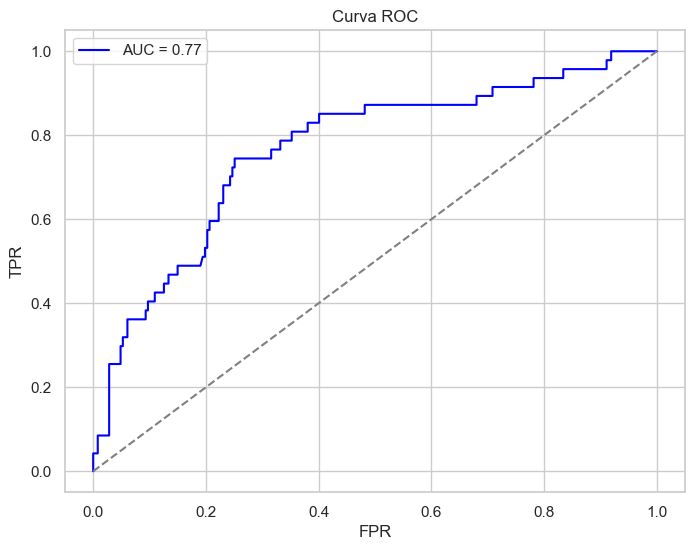

In [22]:
# Se entrena un modelo de clasificación para predecir el abandono de empleados.

if 'abandono' in df.columns:
    df = df.dropna(subset=['abandono'])
    df['abandono'] = df['abandono'].astype(int)
    X = df.drop(columns=['abandono'])
    y = df['abandono']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    print("\nMejores hiperparámetros:", grid_search.best_params_)
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()
else:
    print("Error: La columna 'abandono' no se encuentra en el DataFrame.")

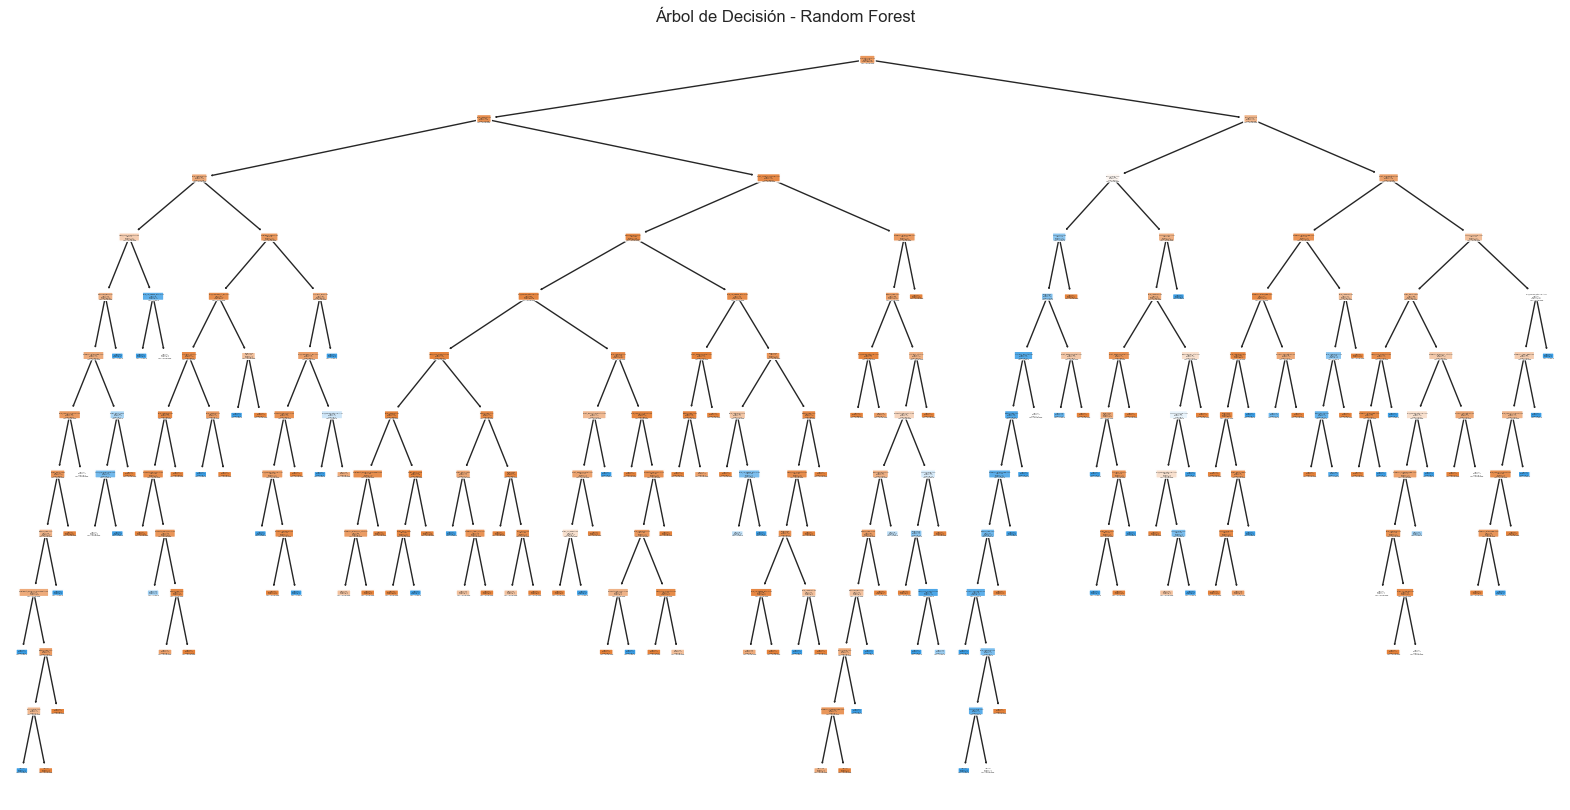

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_model.estimators_[0], feature_names=X.columns, class_names=["No Abandona", "Abandona"], filled=True, rounded=True)
plt.title("Árbol de Decisión - Random Forest")
plt.show()

,Variable,Importancia
4,salario_mes,0.088701
0,edad,0.084930
9,anos_experiencia,0.079084
1,distancia_casa,0.055800
48,horas_extra_Yes,0.050981
11,anos_compania,0.048664
5,num_empresas_anteriores,0.047482
13,anos_con_manager_actual,0.045280
6,incremento_salario_porc,0.039034
8,nivel_acciones,0.032050


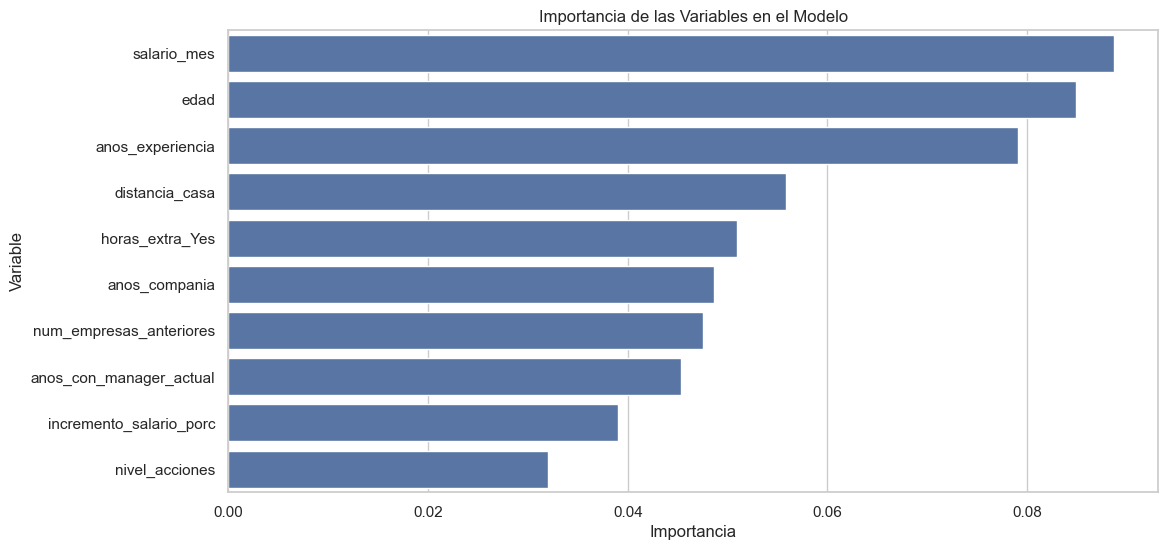

In [23]:
# Obtener la importancia de las variables en el modelo
importances = best_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame con la importancia de cada variable
feature_importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})

# Ordenar de mayor a menor importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar la tabla
display(feature_importance_df)

# Visualización de la importancia de las variables
plt.figure(figsize=(12, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df.head(10))
plt.title('Importancia de las Variables en el Modelo')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()


In [26]:
# Obtener el scoring de predicción (probabilidad de abandono)
df['score_abandono'] = best_model.predict_proba(X)[:, 1]

# Mostrar las primeras filas con el scoring agregado
display(df[['abandono', 'score_abandono']].head())


,abandono,score_abandono
id,,
1,1,0.547214
2,0,0.028262
4,1,0.479369
5,0,0.239286
7,0,0.151405


In [27]:
# Obtener la probabilidad de abandono para cada empleado
df['score_abandono'] = best_model.predict_proba(X)[:, 1]

# Mostrar los 10 empleados con mayor probabilidad de abandono con todas sus características
top_10_abandono = df.sort_values(by='score_abandono', ascending=False).head(10)

# Mostrar la tabla completa de los empleados con mayor probabilidad de abandonar
display(top_10_abandono)

# Guardar el DataFrame con la nueva columna en un archivo CSV
df.to_csv("dataset_con_scoring.csv", index=False)
print("El archivo 'dataset_con_scoring_hiperparametros.csv' ha sido guardado con éxito.")

,edad,abandono,distancia_casa,empleados,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,horas_quincena,nivel_acciones,...,horas_extra_Yes,evaluacion_Muy_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta,conciliacion_Alta,conciliacion_Baja,conciliacion_Media,conciliacion_Muy_Alta,score_abandono
id,,,,,,,,,,,,,,,,,,,,,
614,18,1,5,1,1,1878,1,14,80,0,...,True,False,False,False,True,False,False,False,False,0.914964
1624,18,1,3,1,1,1569,1,12,80,0,...,True,False,False,False,False,False,False,False,False,0.905405
622,26,1,24,1,1,2340,1,18,80,0,...,True,False,False,True,False,False,False,False,False,0.898667
1427,31,1,1,1,1,1359,1,12,80,0,...,False,False,False,True,False,False,False,False,False,0.897075
167,19,1,22,1,1,1675,1,19,80,0,...,True,False,False,False,True,False,False,False,False,0.894948
1248,19,1,10,1,1,1859,1,25,80,0,...,True,True,False,True,False,False,False,False,False,0.884651
1868,29,1,24,1,1,2439,1,24,80,0,...,True,True,False,True,False,False,False,True,False,0.883794
1273,25,1,24,1,1,1118,1,14,80,0,...,True,False,False,False,True,False,True,False,False,0.864429
1928,29,1,24,1,1,1091,1,17,80,0,...,False,False,False,False,True,False,False,False,False,0.863405


El archivo 'dataset_con_scoring_hiperparametros.csv' ha sido guardado con éxito.


# Costo de Reemplazo y estrategias de retencion

In [29]:
# Obtener la probabilidad de abandono y agregarla al DataFrame
df['score_abandono'] = best_model.predict_proba(X)[:, 1]

# Seleccionar los 10 empleados con mayor riesgo de abandono
top_10_abandono = df.sort_values(by='score_abandono', ascending=False).head(10)

# Calcular el costo de reemplazo (100% del salario anual)
top_10_abandono['costo_reemplazo'] = top_10_abandono['salario_mes'] * 12

# Sumar el costo total si esos empleados se fueran
costo_total_reemplazo = top_10_abandono['costo_reemplazo'].sum()

# Mostrar la tabla con empleados en riesgo y su costo de reemplazo
display(top_10_abandono[['score_abandono', 'salario_mes', 'costo_reemplazo']])

# Guardar el DataFrame actualizado con scoring
df.to_csv("dataset_con_scoring.csv", index=False)

# Imprimir el costo total
print(f"\nCosto total estimado de reemplazo si estos empleados abandonan: ${costo_total_reemplazo:,.2f}")

# %% [markdown]
# # Estrategias de Retención
# Basadas en las variables más influyentes en la predicción de abandono.

print("\nEstrategias de Retención:")
print("- Implementar incrementos salariales estratégicos para los empleados en riesgo.")
print("- Mejorar la conciliación entre la vida laboral y personal (home office, horarios flexibles).")
print("- Ofrecer oportunidades de formación y desarrollo profesional.")
print("- Optimizar las condiciones de trabajo y el ambiente organizacional.")
print("- Diseñar planes de carrera y promociones internas para empleados clave.")

,score_abandono,salario_mes,costo_reemplazo
id,,,
614,0.914964,1878,22536
1624,0.905405,1569,18828
622,0.898667,2340,28080
1427,0.897075,1359,16308
167,0.894948,1675,20100
1248,0.884651,1859,22308
1868,0.883794,2439,29268
1273,0.864429,1118,13416
1928,0.863405,1091,13092



Costo total estimado de reemplazo si estos empleados abandonan: $209,388.00

Estrategias de Retención:
- Implementar incrementos salariales estratégicos para los empleados en riesgo.
- Mejorar la conciliación entre la vida laboral y personal (home office, horarios flexibles).
- Ofrecer oportunidades de formación y desarrollo profesional.
- Optimizar las condiciones de trabajo y el ambiente organizacional.
- Diseñar planes de carrera y promociones internas para empleados clave.


In [30]:
import pickle

# Guardar el modelo entrenado en un archivo .pkl
with open('modelo_random_forest.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Modelo guardado exitosamente en 'modelo_random_forest.pkl'")

Modelo guardado exitosamente en 'modelo_random_forest.pkl'
